# **Detecting Spam Email With Machine Learning Optimized With Bio- Inspired Metaheuristic Algorithms**



# > Importing Libraries






In [3]:
#importing libraries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np



## > Loading Dataset



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# https://www.kaggle.com/karthickveerakumar/spam-filter
df = pd.read_csv('/content/drive/MyDrive/datasets/spam_ham_dataset.csv')
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [6]:
df['text'][0]

"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."



# > Information



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB




# > Removing Duplicate Emails


In [8]:
df = df.drop_duplicates(keep = 'last') #remove all duplicate emails from the dataframe
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0




## > Removing unnecessary column



In [9]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [10]:
df.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [11]:
df['text'][3]

'Subject: photoshop , windows , office . cheap . main trending\r\nabasements darer prudently fortuitous undergone\r\nlighthearted charm orinoco taster\r\nrailroad affluent pornographic cuvier\r\nirvin parkhouse blameworthy chlorophyll\r\nrobed diagrammatic fogarty clears bayda\r\ninconveniencing managing represented smartness hashish\r\nacademies shareholders unload badness\r\ndanielson pure caffein\r\nspaniard chargeable levin\r\n'

In [12]:
df['text'][4]

"Subject: re : indian springs\r\nthis deal is to book the teco pvr revenue . it is my understanding that teco\r\njust sends us a check , i haven ' t received an answer as to whether there is a\r\npredermined price associated with this deal or if teco just lets us know what\r\nwe are giving . i can continue to chase this deal down if you need ."

In [13]:
df['text'][10]

"Subject: vocable % rnd - word asceticism\r\nvcsc - brand new stock for your attention\r\nvocalscape inc - the stock symbol is : vcsc\r\nvcsc will be our top stock pick for the month of april - stock expected to\r\nbounce to 12 cents level\r\nthe stock hit its all time low and will bounce back\r\nstock is going to explode in next 5 days - watch it soar\r\nwatch the stock go crazy this and next week .\r\nbreaking news - vocalscape inc . announces agreement to resell mix network\r\nservices\r\ncurrent price : $ 0 . 025\r\nwe expect projected speculative price in next 5 days : $ 0 . 12\r\nwe expect projected speculative price in next 15 days : $ 0 . 15\r\nvocalscape networks inc . is building a company that ' s revolutionizing the\r\ntelecommunications industry with the most affordable phone systems , hardware ,\r\nonline software , and rates in canada and the us . vocalscape , a company with\r\nglobal reach , is receiving international attention for the development of voice\r\nover ip ( 

In [14]:
df['label_num'].value_counts()

0    3672
1    1499
Name: label_num, dtype: int64

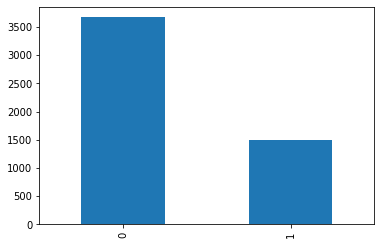

In [15]:
df['label_num'].value_counts().plot(kind='bar')


In [16]:
x = df['text'].values
y = df['label_num'].values

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


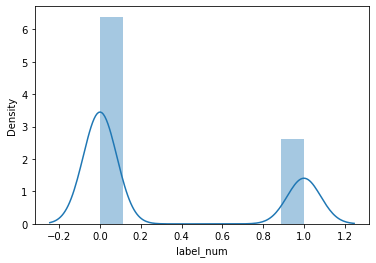

In [17]:
#data visualization 
import seaborn as sns 
sns.distplot(df['label_num'])

In [18]:
df.shape

(5171, 3)

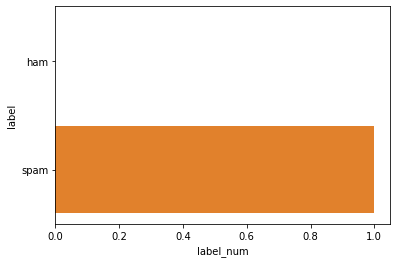

In [19]:
sns.barplot(x=df['label_num'],y=df['label'])
plt.xticks(rotation='horizontal')
plt.show()

In [20]:
#spliting dataset into traning and testing set
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [21]:
x_train

array(['Subject: half day of vac on 2 / 28\r\n12 . 20 dentist appt on 2 / 29',
       'Subject: re : august 2000 estimated availabilities\r\nfrom : victor lamadrid @ ect 07 / 21 / 2000 07 : 53 am\r\nto : carlos j rodriguez / hou / ect @ ect , george smith / hou / ect @ ect , randall l\r\ngay / hou / ect @ ect , pat clynes / corp / enron @ enron , patti sullivan / hou / ect @ ect\r\ncc : cindy vachuska / hou / ect @ ect , clarissa garcia / hou / ect @ ect , meredith\r\nmitchell / hou / ect @ ect , cynthia franklin / corp / enron @ enron , molly\r\nsumrow / hou / ect @ ect , victoria versen / hou / ect @ ect , alvin\r\nthompson / corp / enron @ enron , angie zeman / corp / enron @ enron , jesse\r\nvillarreal / hou / ect @ ect , joann collins / corp / enron @ enron , robert\r\nallwein / hou / ect @ ect , christina sanchez / corp / enron @ enron , joe a\r\ncasas / hou / ect @ ect , edward terry / hou / ect @ ect , tricia bowen / hou / ect @ ect ,\r\nbeverly beaty / hou / ect @ ect , steve 

In [22]:
#feature extraction countvectorizer
from sklearn.feature_extraction.text import CountVectorizer 
vect = CountVectorizer(stop_words='english')
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test) 

In [23]:
# explore tfidf vectorizer (more advanced feature extraction technique than countvectorizer)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(stop_words='english')
x_train_vect = vectorizer.fit_transform(x_train)
x_test_vect = vectorizer.transform(x_test)

In [24]:
x_train_vect.toarray() #al the text is converted to numerical values

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.18890542, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])



# > Model Building



In [25]:
#METHOD 1 SVC
from sklearn.svm import SVC #from support vector machines import support vector classifier
model = SVC()
model.fit(x_train_vect,y_train)

SVC()

In [26]:
y_pred = model.predict(x_test_vect)
y_pred

array([0, 0, 0, ..., 1, 1, 0])

In [27]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       923
           1       0.97      0.99      0.98       370

    accuracy                           0.99      1293
   macro avg       0.98      0.99      0.99      1293
weighted avg       0.99      0.99      0.99      1293



In [28]:
from sklearn.metrics import accuracy_score ,confusion_matrix,precision_score
a1=accuracy_score(y_pred,y_test)
p1=precision_score(y_test,y_pred)
print(a1)
print(confusion_matrix(y_test,y_pred))
print(p1)

0.9891724671307038
[[911  12]
 [  2 368]]
0.968421052631579


In [29]:
df1 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df1

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
1288,1,1
1289,0,0
1290,1,1
1291,1,1


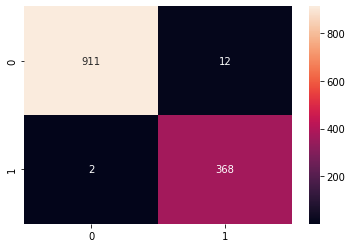

In [54]:
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')

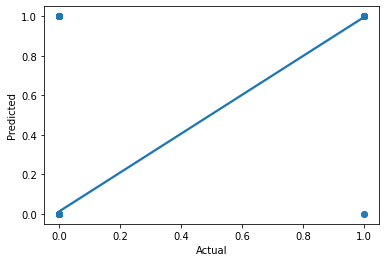

In [32]:
import seaborn as sns

sns.regplot(x='Actual',y='Predicted',data=df1)

In [33]:
#METHOD 2
# SVC + countvectorizer
from sklearn.pipeline import make_pipeline 
model2 = make_pipeline(CountVectorizer(),SVC())

model2.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)
y_pred2

array([0, 0, 0, ..., 1, 1, 0])

In [34]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       923
           1       0.91      0.95      0.93       370

    accuracy                           0.96      1293
   macro avg       0.94      0.95      0.95      1293
weighted avg       0.96      0.96      0.96      1293



In [35]:
a2=accuracy_score(y_pred2,y_test)
p2=precision_score(y_test,y_pred2)
print(a2)
print(confusion_matrix(y_test,y_pred2))
print(p2)
 


0.9574632637277649
[[888  35]
 [ 20 350]]
0.9090909090909091


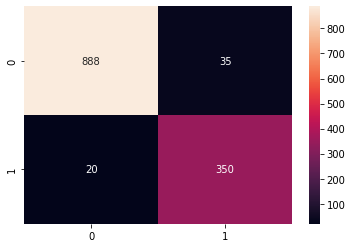

In [56]:
cm=confusion_matrix(y_test,y_pred2)
sns.heatmap(cm,annot=True,fmt='d')

In [36]:
#USING NAIVE BAYES  

In [37]:
# Method 3

In [38]:
from sklearn.naive_bayes import MultinomialNB
model3 = MultinomialNB()

In [39]:
model3.fit(x_train_vect,y_train)

MultinomialNB()

In [40]:
y_pred3 = model3.predict(x_test_vect)
y_pred3

array([0, 0, 0, ..., 1, 1, 0])

In [41]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       923
           1       1.00      0.73      0.84       370

    accuracy                           0.92      1293
   macro avg       0.95      0.86      0.90      1293
weighted avg       0.93      0.92      0.92      1293



In [42]:
a3=accuracy_score(y_pred3,y_test)
p3=precision_score(y_test,y_pred3)
print(a3)
print(confusion_matrix(y_test,y_pred3))
print(p3)



0.9218870843000774
[[922   1]
 [100 270]]
0.996309963099631


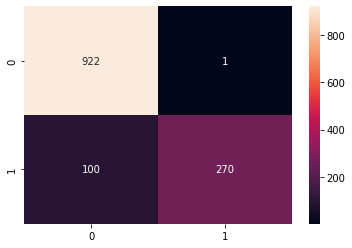

In [57]:
cm=confusion_matrix(y_test,y_pred3)
sns.heatmap(cm,annot=True,fmt='d')

In [43]:
#METHOD 4 NB + Countvectorizer pipeline
from sklearn.pipeline import make_pipeline 
model4 = make_pipeline(CountVectorizer(),MultinomialNB())

model4.fit(x_train,y_train)
y_pred4 = model4.predict(x_test)
y_pred4

array([0, 0, 0, ..., 1, 1, 0])

In [44]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       923
           1       0.96      0.95      0.95       370

    accuracy                           0.97      1293
   macro avg       0.97      0.97      0.97      1293
weighted avg       0.97      0.97      0.97      1293



In [45]:
a4=accuracy_score(y_pred4,y_test)
p4=precision_score(y_test,y_pred4)
print(a4)
print(confusion_matrix(y_test,y_pred4))
print(p4)



0.9737045630317092
[[909  14]
 [ 20 350]]
0.9615384615384616


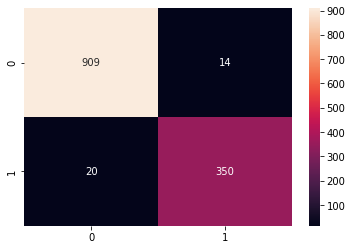

In [58]:
cm=confusion_matrix(y_test,y_pred4)
sns.heatmap(cm,annot=True,fmt='d')

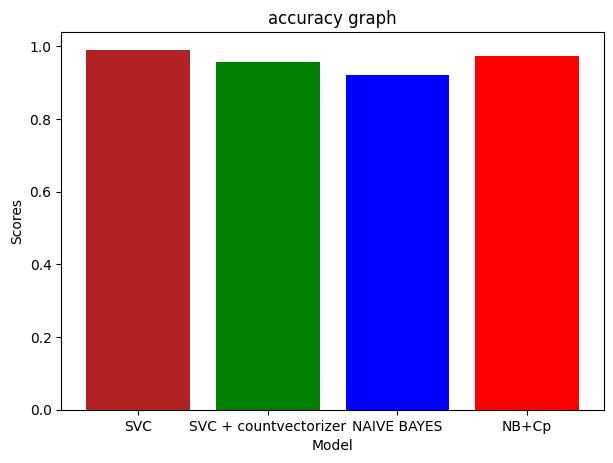

In [60]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(7,5),'figure.dpi':100})
A = ['SVC','SVC + countvectorizer','NAIVE BAYES','NB+Cp']
B = [a1,a2,a3,a4]
#bar plot
plt.bar(A,B,color=['firebrick','green','blue','red'])

#add title
plt.title("accuracy graph")
#add x and y labels
plt.xlabel("Model")
plt.ylabel("Scores")
plt.savefig("accuracy_graph.png")

#show plot

plt.show()

In [46]:
# WEBAPP using this model 
# Entered text is spam or not 

In [47]:
import joblib 
joblib.dump(model4,'spam-email')

['spam-email']

In [48]:
import joblib
reload_model = joblib.load('spam-email')

In [49]:
reload_model.predict(['hello'])

array([1])

In [50]:
reload_model.predict(['free tickets'])

array([0])



## > Making Web Aplication



In [51]:
#STREAMLIT (used to create the webapp)
!pip install streamlit --quiet 

     |████████████████████████████████| 9.1 MB 7.1 MB/s 
     |████████████████████████████████| 4.3 MB 40.7 MB/s 
     |████████████████████████████████| 235 kB 56.7 MB/s 
     |████████████████████████████████| 181 kB 52.5 MB/s 
     |████████████████████████████████| 78 kB 8.7 MB/s 
     |████████████████████████████████| 164 kB 56.3 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 132 kB 63.7 MB/s 
     |████████████████████████████████| 423 kB 53.4 MB/s 
     |████████████████████████████████| 132 kB 64.6 MB/s 
     |████████████████████████████████| 793 kB 60.2 MB/s 
     |████████████████████████████████| 381 kB 59.7 MB/s 
     |████████████████████████████████| 51 kB 8.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nbclient 0.6.6 requires traitlets>=5.2.2, but you have traitlets 5.1.1 which i

In [52]:
%%writefile app.py 
import streamlit as st 
import joblib 
st.title("SPAM TEXT/EMAIL CLASSIFICATION")
reload_model = joblib.load('spam-email')

ip = st.text_input("Enter the email/text :")
op = reload_model.predict([ip])

if st.button('PREDICT'):
  #st.title(op[0])
  if op[0]==1:
    st.subheader("The E-mail is Spam!")
  elif op[0]==0:
    st.subheader("The E-mail is not spam...!")
  else:
    print("wait..!")

Writing app.py


In [53]:
#to run this streamlit web application 
!streamlit run app.py & npx localtunnel --port 8501
# external link using port forwarding service of localtunnel is used

2022-07-19 04:45:09.983 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
npx: installed 22 in 4.712s


KeyboardInterrupt: ignored

# **Thank You...!**